In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 122.7 kB/s eta 0:00:001m109.1 kB/s eta 0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [nltk]━━━━━━ 3/4 [nltk]]


In [4]:
data = pd.read_csv('Sentiment_dataset.csv')

In [5]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [22]:
data.shape

(732, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [10]:
data.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [35]:
data_cleaned = data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Timestamp'], errors='ignore')

In [36]:
data_cleaned.head()

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,enjoying a beautiful day at the park ...,Positive,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,traffic was terrible this morning ...,Negative,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,just finished an amazing workout,Positive,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,excited about the upcoming weekend getaway ...,Positive,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,trying out a new recipe for dinner tonight ...,Neutral,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [37]:
data_cleaned.to_csv('sentiment_dataset_cleaned.csv', index=False)

In [39]:
data = pd.read_csv('Sentiment_dataset_cleaned.csv')

In [11]:
def clean_text(text):
    text = text.lower()  
    text = re.sub(r'[^\w\s]', '', text)
    return text

data['Text'] = data['Text'].apply(clean_text)

In [17]:
#!pip install wordcloud matplotlib

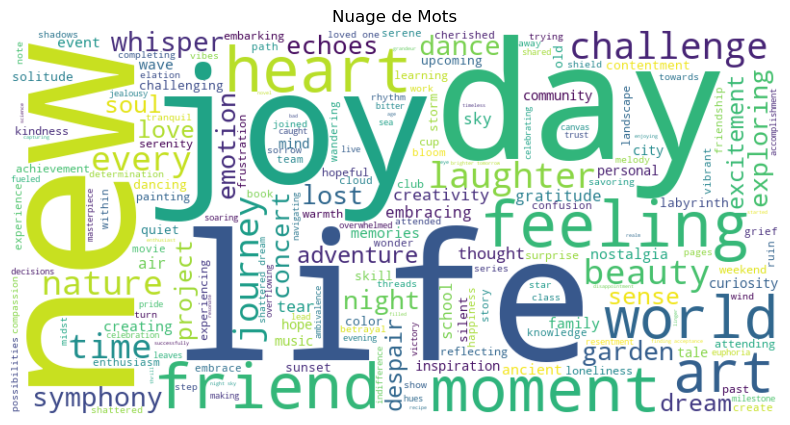

In [44]:
text_combined = ' '.join(data['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Pas d'axes
plt.title('Nuage de Mots')
plt.show()

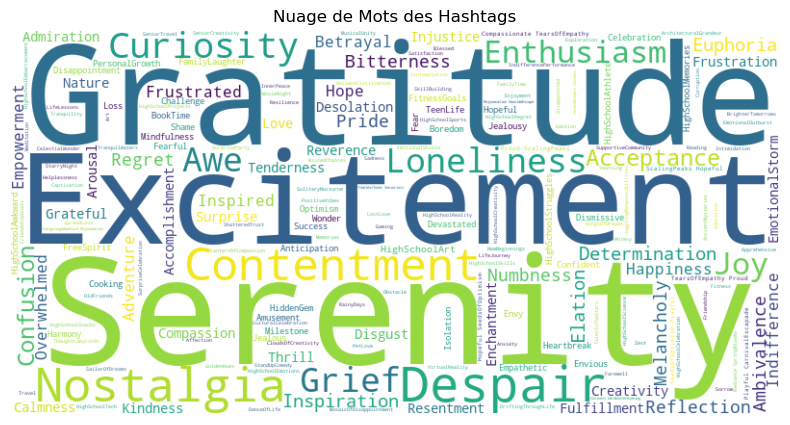

In [24]:
data['Hashtags'] = data['Hashtags'].fillna('')
hashtags_combined = ' '.join(data['Hashtags'])

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(hashtags_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Pas d'axes
plt.title('Nuage de Mots des Hashtags')
plt.show()

Text(0, 0.5, "Nombre d'Occurrences")

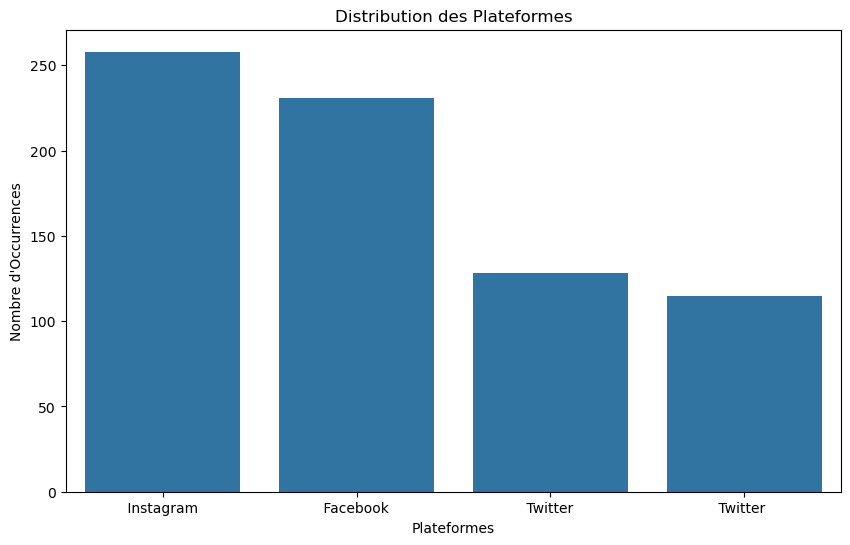

In [45]:
platform_counts = data['Platform'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title('Distribution des Plateformes')
plt.xlabel('Plateformes')
plt.ylabel('Nombre d\'Occurrences')

In [34]:
sentiment_counts = data['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Positive           44
Joy                42
Excitement         32
Neutral            14
Contentment        14
                   ..
Adrenaline          1
Harmony             1
ArtisticBurst       1
Radiance            1
Elegance            1
Name: count, Length: 279, dtype: int64


In [55]:
data['Sentiment'].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

In [56]:
data['Sentiment'] = data['Sentiment'].astype(str).str.strip()

sentiments_cibles = ['Positive', 'Negative', 'Neutral']
df_filtré = data[data['Sentiment'].isin(sentiments_cibles)].copy()

df_filtré['Sentiment'].value_counts()


Sentiment
Positive    45
Neutral     18
Negative     4
Name: count, dtype: int64

In [82]:
sentiments_to_keep = ['Positive', 'Neutral', 'Negative']

filtered_data = data[data['Sentiment'].isin(sentiments_to_keep)]

filtered_data.head()

filtered_data.to_csv('sentiment_dataset_filtered.csv', index=False)

In [83]:
df = pd.read_csv('sentiment_dataset_filtered.csv')

In [85]:
df['Sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [87]:
df.head()

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Clean_Text
0,enjoying a beautiful day at the park ...,Positive,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying beautiful day park
1,traffic was terrible this morning ...,Negative,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic terrible morning
2,just finished an amazing workout,Positive,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,finished amazing workout
3,excited about the upcoming weekend getaway ...,Positive,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited upcoming weekend getaway
4,trying out a new recipe for dinner tonight ...,Neutral,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying new recipe dinner tonight


In [77]:
df.shape

(732, 12)

In [89]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|@\S+|#\S+", "", text)  # remove URLs, mentions, hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)        # keep only letters
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['Clean_Text'] = df['Text'].astype(str).apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/agossoumendel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/agossoumendel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [90]:
X = df['Clean_Text']
y = df['Sentiment']

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Modèle 1 : Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Modèle 2 : Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)